In [2]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,7,8,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,1
8,9,9,0
9,9,2,0


In [6]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

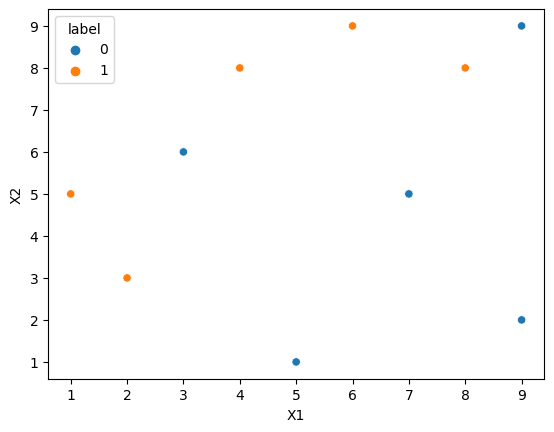

In [7]:
sns.scatterplot(x=df['X1'], y = df['X2'], hue = df['label'])

In [8]:
df['weight'] = 1/df.shape[0]

In [9]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,7,5,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [13]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [14]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

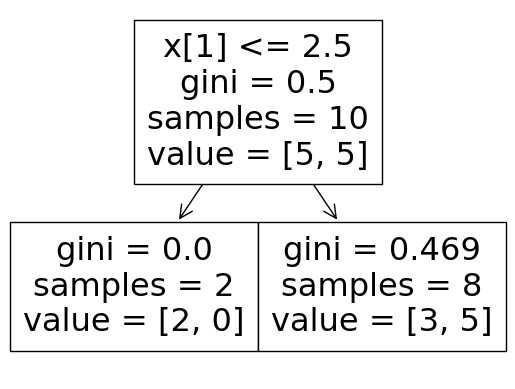

In [15]:
plot_tree(dt1)

<Axes: >

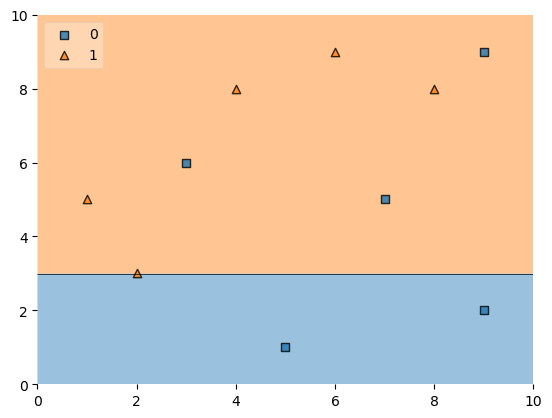

In [16]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [17]:
df['y_pred'] = dt1.predict(X)

In [18]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,7,5,0,0.1,1
7,8,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [240]:
def calculate_model_wight(error):
    return 0.5* np.log(((1-error)/error))

In [41]:
# calculate model weight
alpha1 = calculate_model_wight(0.3)
alpha1

0.42364893019360184

In [50]:
# update weights
def update_row_weights(row,alpha=alpha1):
    if row['label'] == row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)

In [52]:
df['update_weights'] = df.apply(update_row_weights,axis=1)

In [54]:
df

,X1,X2,label,weight,y_pred,update_weights
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,7,5,0,0.1,1,0.152753
7,8,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [58]:
df['update_weights'].sum()

0.9165151389911682

In [70]:
df['normalized_weights'] = df['update_weights']/df['update_weights'].sum()

In [72]:
df

,X1,X2,label,weight,y_pred,update_weights,normalized_wights,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.071429
2,3,6,0,0.1,1,0.152753,0.166667,0.166667
3,4,8,1,0.1,1,0.065465,0.071429,0.071429
4,5,1,0,0.1,0,0.065465,0.071429,0.071429
5,6,9,1,0.1,1,0.065465,0.071429,0.071429
6,7,5,0,0.1,1,0.152753,0.166667,0.166667
7,8,8,1,0.1,1,0.065465,0.071429,0.071429
8,9,9,0,0.1,1,0.152753,0.166667,0.166667
9,9,2,0,0.1,0,0.065465,0.071429,0.071429


In [74]:
df['normalized_weights'].sum()

0.9999999999999999

In [76]:
df['cumsum_upper'] = np.cumsum([df['normalized_weights']])

In [82]:
df.drop('normalized_weights',axis=1,inplace=True)

In [96]:
df.rename(columns={'normalized_wights':'normalized_weights'},inplace=True)

In [98]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [106]:
df[['X1','X2','label','weight','y_pred','update_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,update_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065465,0.000000,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,1,0.152753,0.142857,0.309524
3,4,8,1,0.1,1,0.065465,0.309524,0.380952
4,5,1,0,0.1,0,0.065465,0.380952,0.452381
5,6,9,1,0.1,1,0.065465,0.452381,0.523810
6,7,5,0,0.1,1,0.152753,0.523810,0.690476
7,8,8,1,0.1,1,0.065465,0.690476,0.761905
8,9,9,0,0.1,1,0.152753,0.761905,0.928571
9,9,2,0,0.1,0,0.065465,0.928571,1.000000


In [108]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [110]:
index_values = create_new_dataset(df)

In [112]:
index_values

[5, 3, 2, 7, 8, 6, 0, 8, 0, 8]

In [114]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weight
5,6,9,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
7,8,8,1,0.1
8,9,9,0,0.1
6,7,5,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1


In [116]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [118]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [120]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

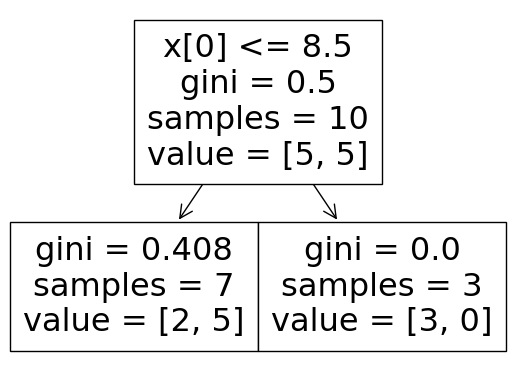

In [122]:
plot_tree(dt2)

<Axes: >

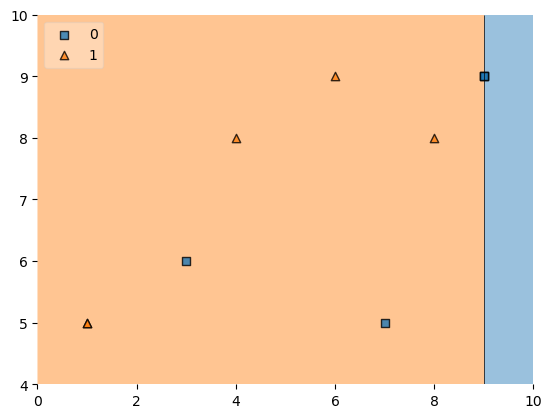

In [124]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [126]:
second_df['y_pred'] = dt2.predict(X)

In [128]:
second_df

,X1,X2,label,weight,y_pred
5,6,9,1,0.1,1
3,4,8,1,0.1,1
2,3,6,0,0.1,1
7,8,8,1,0.1,1
8,9,9,0,0.1,0
6,7,5,0,0.1,1
0,1,5,1,0.1,1
8,9,9,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0


In [130]:
alpha2 = calculate_model_wight(0.2)

In [142]:
# Step 4 - Update weights
def update_row_weights(row,alpha=alpha2):
  if row['label'] == row['y_pred']:
    return row['weight'] * np.exp(-alpha)
  else:
    return row['weight'] * np.exp(alpha)

In [144]:
# update weights
second_df['updated_weights'] = second_df.apply( update_row_weights,axis=1)

In [146]:
second_df

,X1,X2,label,weight,y_pred,updated_weights
5,6,9,1,0.1,1,0.05
3,4,8,1,0.1,1,0.05
2,3,6,0,0.1,1,0.20
7,8,8,1,0.1,1,0.05
8,9,9,0,0.1,0,0.05
6,7,5,0,0.1,1,0.20
0,1,5,1,0.1,1,0.05
8,9,9,0,0.1,0,0.05
0,1,5,1,0.1,1,0.05
8,9,9,0,0.1,0,0.05


In [150]:
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [152]:
second_df

,X1,X2,label,weight,y_pred,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.05,0.0625
3,4,8,1,0.1,1,0.05,0.0625
2,3,6,0,0.1,1,0.20,0.2500
7,8,8,1,0.1,1,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625
6,7,5,0,0.1,1,0.20,0.2500
0,1,5,1,0.1,1,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625
0,1,5,1,0.1,1,0.05,0.0625
8,9,9,0,0.1,0,0.05,0.0625


In [154]:
second_df['normalized_weights'].sum()

1.0

In [156]:
second_df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [158]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [166]:
second_df[['X1','X2','label','weight','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,normalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.0625,0.461310,0.523810
3,4,8,1,0.1,1,0.0625,0.318452,0.380952
2,3,6,0,0.1,1,0.2500,0.059524,0.309524
7,8,8,1,0.1,1,0.0625,0.699405,0.761905
8,9,9,0,0.1,0,0.0625,0.866071,0.928571
6,7,5,0,0.1,1,0.2500,0.440476,0.690476
0,1,5,1,0.1,1,0.0625,0.008929,0.071429
8,9,9,0,0.1,0,0.0625,0.866071,0.928571
0,1,5,1,0.1,1,0.0625,0.008929,0.071429
8,9,9,0,0.1,0,0.0625,0.866071,0.928571


In [224]:
def create_new_dataset(df):
    count =0
    indices = []
    
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                count += 1
                indices.append(index)
    print(df.shape[0],count)
    return indices
    




index_values = create_new_dataset(second_df)

10 10


In [226]:
index_values

[2, 2, 2, 2, 3, 5, 6, 6, 0, 0]

In [228]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weight
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
7,8,8,1,0.1
6,7,5,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [230]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

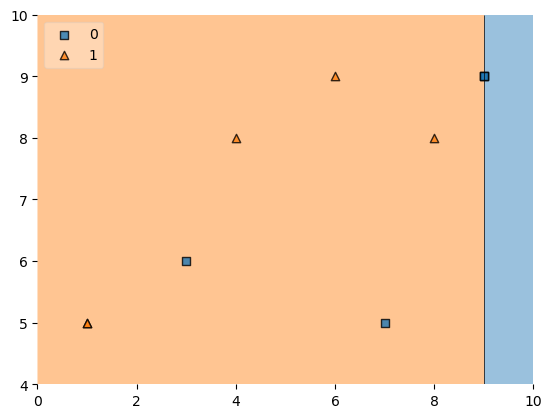

In [232]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [234]:
third_df['y_pred'] = dt3.predict(X)

In [236]:
third_df

,X1,X2,label,weight,y_pred
2,3,6,0,0.1,1
2,3,6,0,0.1,1
2,3,6,0,0.1,1
2,3,6,0,0.1,1
7,8,8,1,0.1,0
6,7,5,0,0.1,1
0,1,5,1,0.1,1
0,1,5,1,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,0


In [244]:
alpha3 = calculate_model_wight(0.7)
alpha3

-0.4236489301936017

In [246]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 0.6931471805599453 -0.4236489301936017


# prediction

In [249]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [251]:
dt2.predict(query)

array([1], dtype=int64)

In [253]:
dt3.predict(query)

array([1], dtype=int64)

In [257]:
signal = alpha1*1 + alpha2*1 + alpha3*1

In [259]:
np.sign(signal)

1.0

In [261]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [263]:
dt2.predict(query)

array([0], dtype=int64)

In [265]:
dt3.predict(query)

array([0], dtype=int64)

In [277]:
sign1 = alpha1*(1) + alpha2*(-1) + alpha3*(-1)

In [279]:
np.sign(sign1)

1.0

In [281]:
sign1

0.15415067982725827